In [2]:
########################################################################################################################
#_____________________________________________________Import Section___________________________________________ 
########################################################################################################################
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
import cv2
import scipy.io as sio
import ntpath
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import get_file, get_source_inputs

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
########################################################################################################################
#______________________________________________Loading Data Section into the Dataframe___________________________________________ 
########################################################################################################################
# train_data = {'X_train': train ,'y_train':y_train}
# sio.savemat('/content/drive/MyDrive/CGAS_FoodCategorization/train_data25.mat', train_data)
data = sio.loadmat('/content/drive/MyDrive/CGAS_FoodCategorization/train_data25.mat')

In [6]:
X = data['X_train']
y = data['y_train']
len(X)

20389

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
np.unique(y_train)

array(['chocolate ', 'cup       ', 'donuts    ', 'dumplings ',
       'french    ', 'fried     ', 'garlic    ', 'gnocchi   ',
       'grilled   ', 'hamburger ', 'hot       ', 'ice       ',
       'macarons  ', 'mussels   ', 'nachos    ', 'pancakes  ',
       'pizza     ', 'red       ', 'samosa    ', 'spring    ',
       'strawberry', 'sushi     ', 'waffles   '], dtype='<U10')

In [9]:
def remove_space(string):
    return string.replace(" ", "")

In [10]:
train_labels = []
for y in y_train:
  train_labels.append(remove_space(y))
y_train = train_labels

In [11]:
np.unique(y_train)

array(['chocolate', 'cup', 'donuts', 'dumplings', 'french', 'fried',
       'garlic', 'gnocchi', 'grilled', 'hamburger', 'hot', 'ice',
       'macarons', 'mussels', 'nachos', 'pancakes', 'pizza', 'red',
       'samosa', 'spring', 'strawberry', 'sushi', 'waffles'], dtype='<U10')

In [12]:
freq_train = {}
for y in y_train:
  if y not in freq_train:
    freq_train[y] = 1

  else:
    freq_train[y] += 1
freq_train

{'chocolate': 1443,
 'cup': 779,
 'donuts': 553,
 'dumplings': 766,
 'french': 1401,
 'fried': 626,
 'garlic': 583,
 'gnocchi': 804,
 'grilled': 793,
 'hamburger': 540,
 'hot': 721,
 'ice': 696,
 'macarons': 759,
 'mussels': 578,
 'nachos': 601,
 'pancakes': 664,
 'pizza': 561,
 'red': 609,
 'samosa': 640,
 'spring': 443,
 'strawberry': 600,
 'sushi': 521,
 'waffles': 630}

In [13]:
test_labels = []
for y in y_test:
  test_labels.append(remove_space(y))
y_test = test_labels

In [14]:
np.unique(y_test)

array(['chocolate', 'cup', 'donuts', 'dumplings', 'french', 'fried',
       'garlic', 'gnocchi', 'grilled', 'hamburger', 'hot', 'ice',
       'macarons', 'mussels', 'nachos', 'pancakes', 'pizza', 'red',
       'samosa', 'spring', 'strawberry', 'sushi', 'waffles'], dtype='<U10')

In [15]:
freq_test = {}
for y in y_test:
  if y not in freq_test:
    freq_test[y] = 1

  else:
    freq_test[y] += 1
freq_test

{'chocolate': 352,
 'cup': 181,
 'donuts': 154,
 'dumplings': 214,
 'french': 374,
 'fried': 146,
 'garlic': 174,
 'gnocchi': 181,
 'grilled': 178,
 'hamburger': 136,
 'hot': 177,
 'ice': 185,
 'macarons': 183,
 'mussels': 144,
 'nachos': 136,
 'pancakes': 161,
 'pizza': 143,
 'red': 167,
 'samosa': 152,
 'spring': 99,
 'strawberry': 141,
 'sushi': 147,
 'waffles': 153}

In [16]:
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(y_train)
test_int_encoded = label_encoder.fit_transform(y_test)
int_encoded

array([14, 17,  7, ...,  7,  1,  3])

In [17]:
onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
train_encoded = onehot_encoder.fit_transform(int_encoded)
print(train_encoded)
print("test encoded: ")
test_int_encoded = test_int_encoded.reshape(len(test_int_encoded), 1)
test_encoded = onehot_encoder.fit_transform(test_int_encoded)
print(test_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
test encoded: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
print(len(train_encoded))
print(len(test_encoded))

16311
4078


In [20]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='CGAS_InceptionV3.ckpt',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# **Inception v3**

In [23]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam,SGD

base_model = InceptionV3(input_shape = (192, 192, 3), include_top = False,weights='imagenet')

# x=layers.Conv2D(128, (2,2), activation='relu', input_shape=(192,192, 3))(base_model.output)
# x=layers.Conv2D(128, (1,1), activation='relu')(x)
# x=layers.Conv2D(512, (1,1), activation='relu')(x)
# x=layers.Conv2D(64, (1,1), activation='relu')(x)
# x=layers.MaxPooling2D((1,1), strides=2)(x)
# x=layers.Conv2D(32, (1,1), activation='relu')(x)
# x=layers.MaxPooling2D((1,1), strides=2)(x)

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 8 node for classification output
x = layers.Dense(23, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 95, 95, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 95, 95, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [24]:
hist=model.fit(X_train, train_encoded, batch_size=32,callbacks=checkpoint, validation_data=(X_test, test_encoded),epochs=10)

Epoch 1/10
510/510 [==============================] - 290s 518ms/step - loss: 0.0871 - acc: 0.6430 - val_loss: 0.0624 - val_acc: 0.7879
Epoch 2/10
510/510 [==============================] - 258s 506ms/step - loss: 0.0350 - acc: 0.8673 - val_loss: 0.0776 - val_acc: 0.8122
Epoch 3/10
510/510 [==============================] - 257s 505ms/step - loss: 0.0199 - acc: 0.9300 - val_loss: 0.0903 - val_acc: 0.8185
Epoch 4/10
510/510 [==============================] - 262s 514ms/step - loss: 0.0142 - acc: 0.9533 - val_loss: 0.1434 - val_acc: 0.8021
Epoch 5/10
510/510 [==============================] - 257s 503ms/step - loss: 0.0109 - acc: 0.9675 - val_loss: 0.1646 - val_acc: 0.8161
Epoch 6/10
510/510 [==============================] - 256s 502ms/step - loss: 0.0093 - acc: 0.9711 - val_loss: 0.3753 - val_acc: 0.8043
Epoch 7/10
510/510 [==============================] - 256s 502ms/step - loss: 0.0092 - acc: 0.9737 - val_loss: 0.1537 - val_acc: 0.8016
Epoch 8/10
510/510 [============================

In [25]:
# ########################################################################################################################
# #____________________________________________________________Saving The Model___________________________________#
# ########################################################################################################################

model.save("/content/drive/MyDrive/CGAS_FoodCategorization/inception_model.pb")
accuracy = model.evaluate(x=X_test,y=test_encoded,batch_size=256)
print("Test loss:",accuracy[0])
print("Test accuracy: ",accuracy[1])

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CGAS_FoodCategorization/inception_model.pb/assets
16/16 [==============================] - 21s 1s/step - loss: 0.1059 - acc: 0.8193
Test loss: 0.10591458529233932
Test accuracy:  0.8192741274833679


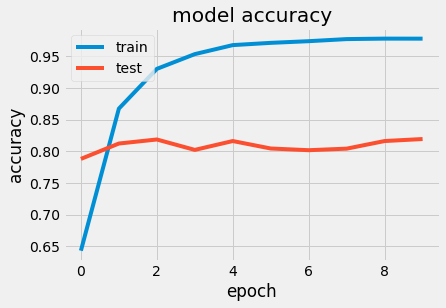

In [26]:
########################################################################################################################
#____________________________________________________________Accuracy Plot Of the MOdel___________________________________#
########################################################################################################################

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

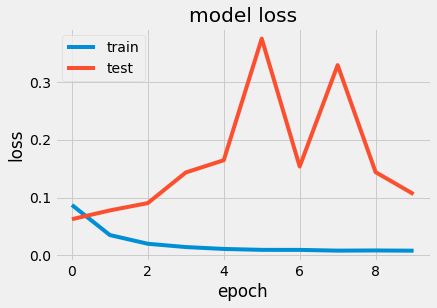

In [27]:
########################################################################################################################
#____________________________________________________________Loss Plot Of the Model___________________________________#
########################################################################################################################

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()